In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn 
import statsmodels.api as sp

In [66]:
ldata=pd.read_csv(r'C:\Users\Nayee\OneDrive\Desktop\matplotlib\env\loan dataset.csv')

In [67]:
ldata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplican_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [68]:
ldata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
Applicant_Income      0
Coapplican_Income     0
Loan_Amount           5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [69]:
ldata.dropna

<bound method DataFrame.dropna of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     Applicant_Income  Coapplican_Income  Loan_Amount  Loan_Amount_Term  \
0                5720                 

In [70]:
ldata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplican_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [71]:
loandata=ldata.drop(columns=['Loan_ID'])

In [72]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplican_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
for column in loandata.columns:
    loandata[column]=lc.fit_transform(loandata[column])

In [74]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplican_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,251,0,52,10,1,2
1,1,1,1,0,0,102,43,67,10,1,2
2,1,1,2,0,0,230,67,119,10,1,2
3,1,1,2,0,0,43,110,42,10,2,2
4,1,0,0,1,0,120,0,25,10,1,2


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [76]:
x=loandata.drop(columns=['Loan_Amount'])
y=loandata['Loan_Amount']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [78]:
rfc=RandomForestRegressor()

In [79]:
model=rfc.fit(x_train,y_train)


In [80]:
model

RandomForestRegressor()

In [81]:
y_pred=rfc.predict(x_test)
mean_absolute_error(y_test,y_pred)

19.93207207207207

Text(0, 0.5, 'feature')

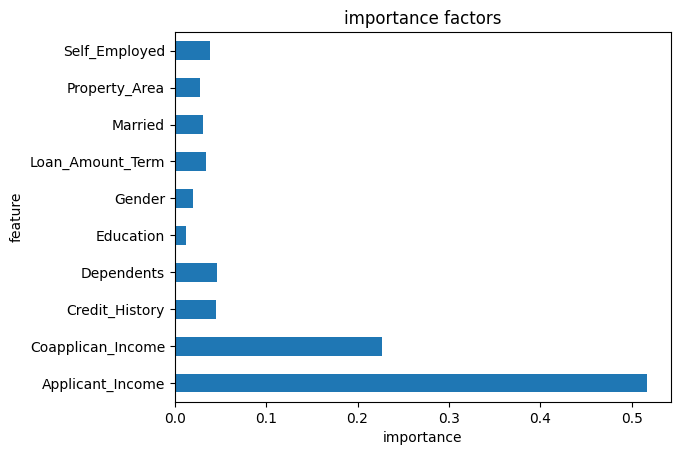

In [82]:
model_ranks=pd.Series(rfc.feature_importances_,index=x_train.columns,name='importance').sort_index()
ax=model_ranks.plot(kind='barh')
ax.set_title('importance factors')
ax.set_xlabel('importance')
ax.set_ylabel('feature')


In [83]:
lc=loandata.corr()

Text(158.08159722222223, 0.5, 'variables')

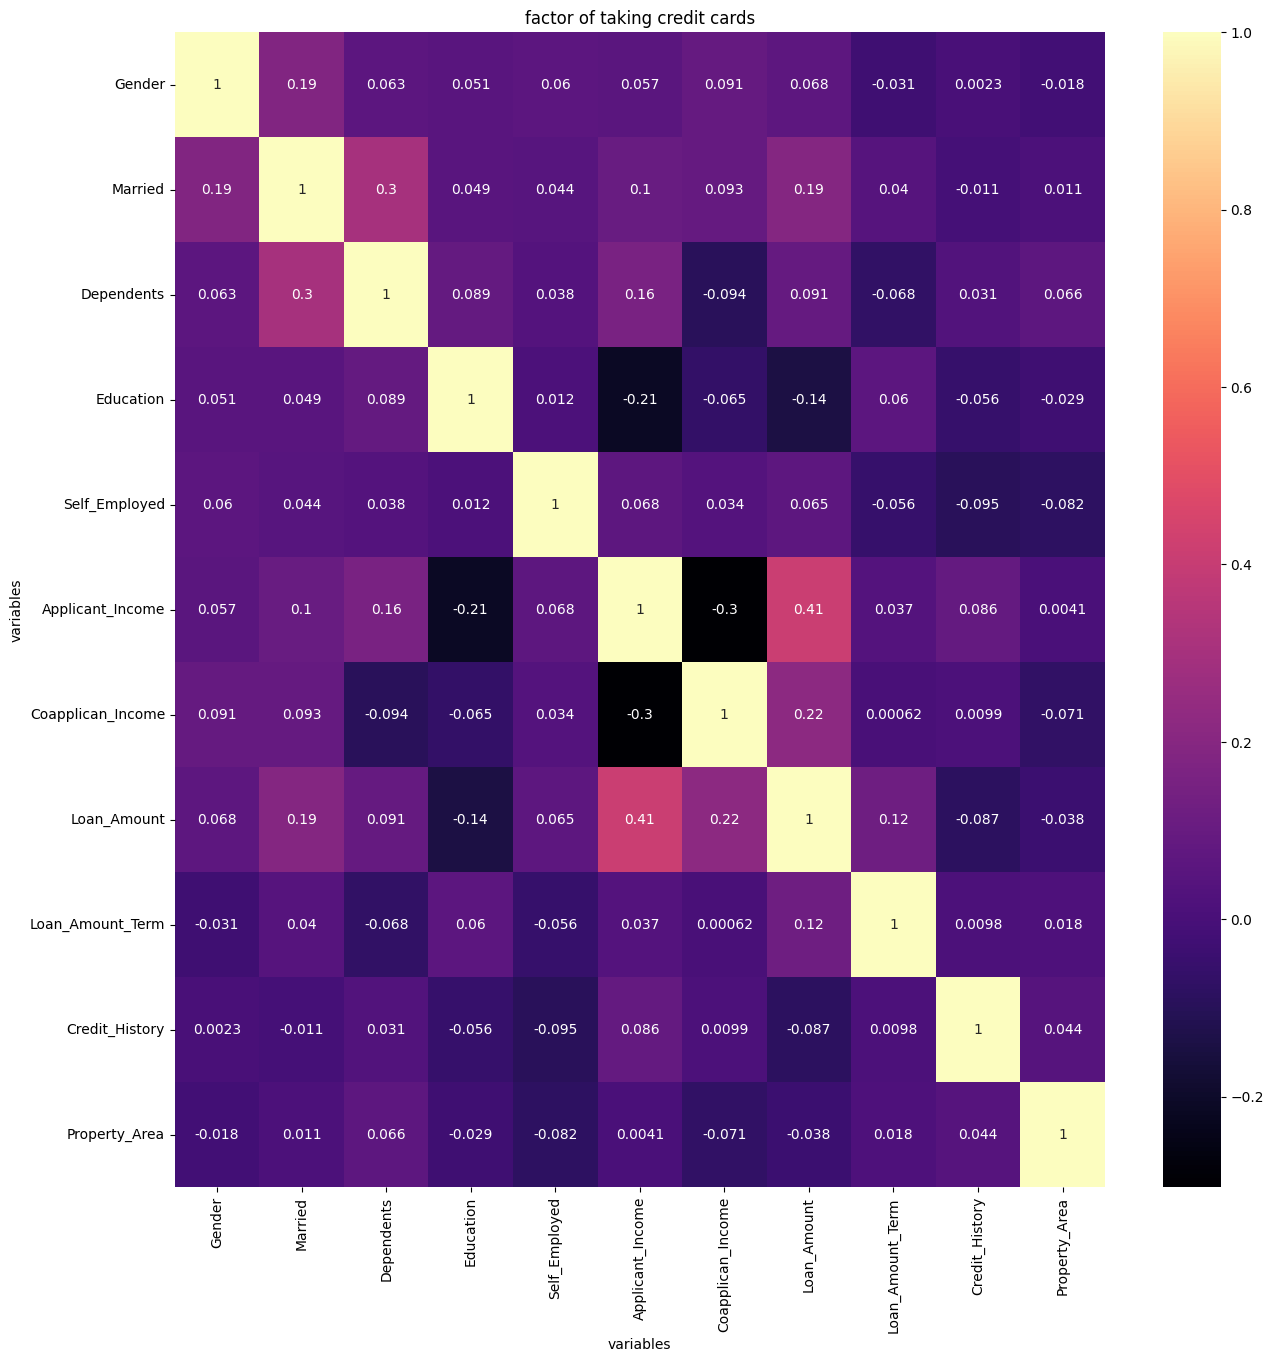

In [84]:
plt.figure(figsize=(15,15))
sn.heatmap(lc,annot=True,cmap='magma')
plt.title('factor of taking credit cards')
plt.xlabel('variables')
plt.ylabel('variables')


In [85]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
model=lin.fit(x_train,y_train)

In [86]:
yp=model.predict(x_test)
mean_absolute_error(y_test,yp)

22.0524423221749

In [87]:
model.coef_

array([ 2.26357255,  7.33757616,  0.35460753, -2.49415163, -0.24086735,
        0.19205827,  0.18855988,  2.6612554 , -8.74006791,  1.83226072])

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [89]:
scaler=StandardScaler()

In [90]:
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [91]:
poly=PolynomialFeatures(degree=1)
x_poly_train=poly.fit_transform(x_train_scaler)
x_poly_test=poly.transform(x_test_scaler)
model=poly.fit(x_poly_train,y_train)


In [92]:
model

PolynomialFeatures(degree=1)

In [93]:
lin=LinearRegression()
model2=lin.fit(x_poly_train,y_train)

In [94]:
model2

LinearRegression()

In [95]:
model2.coef_

array([ 0.        ,  0.95018428,  3.54476458,  0.42458143, -0.99619626,
       -0.13274193, 17.19411901, 11.91918707,  3.95914097, -4.16406909,
        1.48478392])

In [96]:
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplican_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,251,0,52,10,1,2
1,1,1,1,0,0,102,43,67,10,1,2
2,1,1,2,0,0,230,67,119,10,1,2
3,1,1,2,0,0,43,110,42,10,2,2
4,1,0,0,1,0,120,0,25,10,1,2
